# Тестовое задание:

Возьмите свою страницу Вконтакте, соберите по ней таблицу с датой постов и количеством лайков и напишите SQL-запросы, которые позволят ответить на вопрос: что больше всего влияет на количество лайков: время суток публикации, день недели или промежуток между постами.

В качестве ответа приложите таблицу в формате CSV, SQL-запросы с необходимыми пояснениями и выводом. Вместо своей страницы можно взять станицу друга, в любом случае укажите адрес страницы.

-----
Адресс страницы: https://vk.com/stallionred

In [1]:
# Импортирую необходимые для работы библиотеки.
import pandas as pd
import numpy as np
import requests
import sqlite3
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## Устанавливаю ключ доступа своей страницы - token, id - айди своей страницы, 
# version - версию API социальной сети ВКонтакте, count - колличество постов на странице.
# token = "vk1.a.Hy-YoBnYxfdBYjZazF2KhQJYtqWfyoL3GFqFD_ZcjuaO4B1A6iicP2f2f8LpiMxTRYTdsiuD7ydkPn1mrq0rwQEzoqYSX0NNI8t75Xr-6tPy54BVxaszXm1ODHzfEWqzZmiWNfAwn6xzQmIPVwlej-Z5ypH1KML7ldQGaJGXHd-LafM18Dwna7A1AKSnY8m02l-5dtcsguABPpWtk4ve1Q"
# owner_id = 274427934
# version = "5.131"
# count = 100

In [3]:
## Вставляю вышеперечисленное в url адрес.
# url = f"https://api.vk.com/method/wall.get?owner_id={owner_id}&count={count}&v={version}&access_token={token}"

In [4]:
## Применяю библиотекую requests выполняю HTTP GET запрос к url 
## который возвращает информацию ответа от сервера response.
# response = requests.get(url)

In [5]:
## Преобразую HTTP-ответ в формат JSON.
# data = response.json()

In [6]:
## Создаю список data_list и передаю туда с помощью цикла for 
# дату поста (date) и колличество лайков на нём (likes).
# data_list = []
# for post in data['response']['items']:
    # post_date = datetime.utcfromtimestamp(post['date']).strftime('%Y-%m-%d %H:%M:%S')
    # likes = post['likes']['count']
    # data_list.append({'date': post_date, 'likes': likes})

In [7]:
## Инициализирую DataFrame.
# df = pd.DataFrame(data_list)

### Создаю таблицу, которая получалась (сейчас данные изменены) в результате выполнения всех вышеизложанных действий.

In [8]:
data = {
    'date': [
        '2023-09-24 19:55:55', '2024-09-16 13:38:04', '2023-03-09 01:25:17', 
        '2022-10-24 15:40:21', '2022-08-03 16:02:05', '2022-05-11 23:30:51', 
        '2022-05-07 19:08:08', '2022-01-25 16:50:21', '2022-01-24 21:50:50', 
        '2022-01-16 22:41:07', '2022-01-16 00:46:57', '2021-12-30 21:29:34', 
        '2021-12-18 20:21:13', '2021-12-02 21:47:24', '2021-11-06 11:52:18', 
        '2021-10-25 20:14:55', '2021-10-10 21:30:11', '2021-08-20 17:05:08', 
        '2021-08-01 20:42:26', '2021-06-30 20:30:26', '2021-06-02 19:00:13', 
        '2021-05-16 09:33:32', '2021-05-14 13:43:26', '2021-04-26 08:01:27', 
        '2021-04-04 08:42:04', '2021-04-04 06:31:31', '2020-12-01 17:07:22', 
        '2020-11-29 17:12:58'
    ],
    'likes': [
        9, 5, 1, 2, 12, 1, 5, 15, 1, 2, 10, 7, 15, 16, 3, 21, 3, 5, 12, 1, 
        4, 20, 18, 3, 1, 11, 1, 6
    ]
}

In [9]:
df = pd.DataFrame(data)

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df

,date,likes
0,2023-09-24 19:55:55,9
1,2024-09-16 13:38:04,5
2,2023-03-09 01:25:17,1
3,2022-10-24 15:40:21,2
4,2022-08-03 16:02:05,12
5,2022-05-11 23:30:51,1
6,2022-05-07 19:08:08,5
7,2022-01-25 16:50:21,15
8,2022-01-24 21:50:50,1
9,2022-01-16 22:41:07,2


In [12]:
# Подключаюсь к базе данных SQLite в памяти.
conn = sqlite3.connect(':memory:')

In [13]:
# Сохраняю DataFrame в таблицу SQLite.
df.to_sql('Like', conn, index=False, if_exists='replace')

28

# Влияние времени суток публикации на количество лайков

Предполагаю нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от времени суток.

In [14]:
# С помощью strftime нахожу часы (%H) среди дат в колонке date 
# и подразделяю их на равные промежутки суток для ночи, утра, дня и вечера где
# с 0 до 6 часов — ночь 
# с 6 до 12 часов — утро 
# с 12 до 18 часов — день 
# с 18 до 24 часов — вечер

parts_of_the_day = '''
SELECT date,
       likes,
       strftime('%H', date) AS hour_of_day, 
       CASE 
           WHEN strftime('%H', date) BETWEEN '00' AND '05' THEN 'Ночь'  
           WHEN strftime('%H', date) BETWEEN '06' AND '11' THEN 'Утро' 
           WHEN strftime('%H', date) BETWEEN '12' AND '17' THEN 'День' 
           WHEN strftime('%H', date) BETWEEN '18' AND '23' THEN 'Вечер' 
       END AS time_of_day
FROM Like
ORDER BY hour_of_day;
'''

In [15]:
# Возвращаю sql запрос в виде DataFrame.
df_with_hours = pd.read_sql_query(parts_of_the_day, conn)

In [16]:
df_with_hours

,date,likes,hour_of_day,time_of_day
0,2022-01-16 00:46:57,10,00,Ночь
1,2023-03-09 01:25:17,1,01,Ночь
2,2021-04-04 06:31:31,11,06,Утро
3,2021-04-26 08:01:27,3,08,Утро
4,2021-04-04 08:42:04,1,08,Утро
5,2021-05-16 09:33:32,20,09,Утро
6,2021-11-06 11:52:18,3,11,Утро
7,2024-09-16 13:38:04,5,13,День
8,2021-05-14 13:43:26,18,13,День
9,2022-10-24 15:40:21,2,15,День


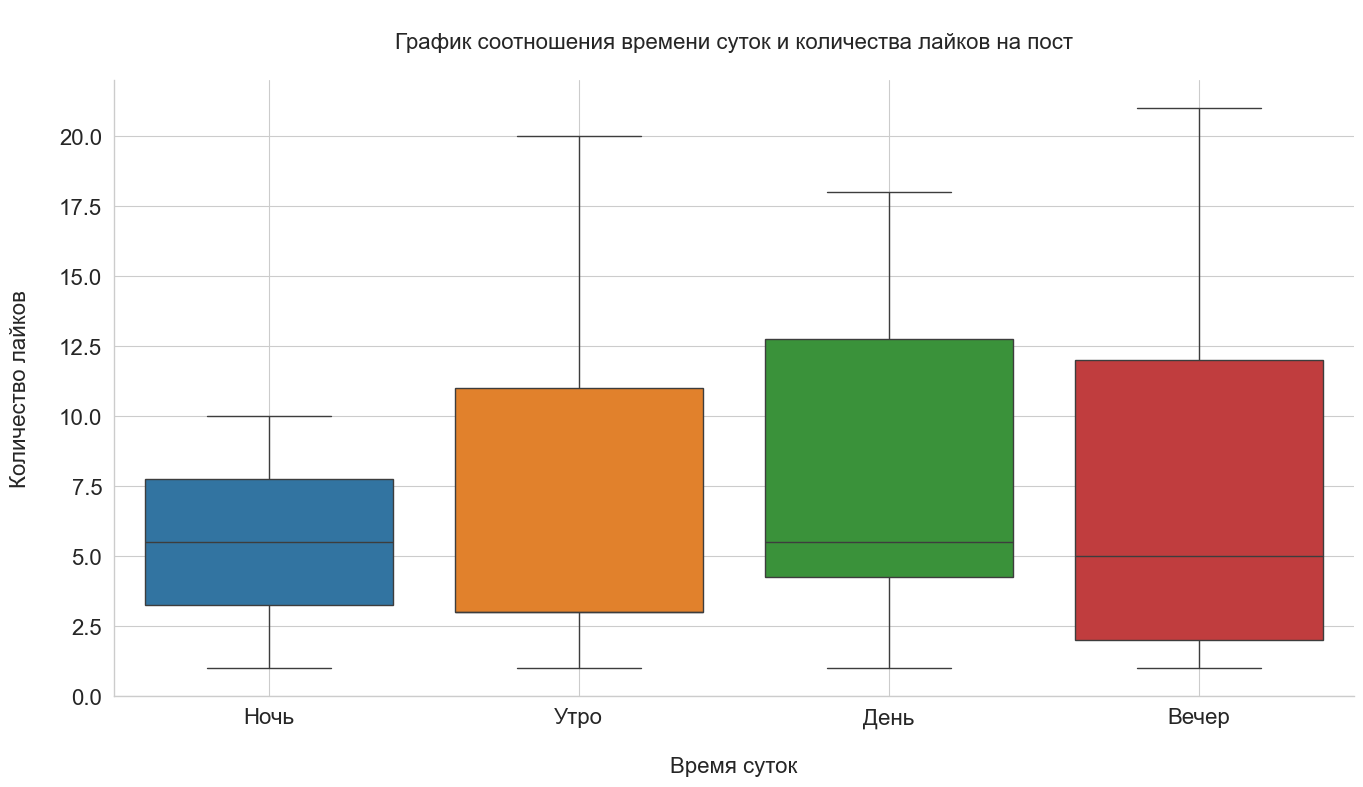

In [17]:
# С помощью matplotlib.pyplot и seaborn визуализирую график соотношения времени суток и количества лайков на пост.
plt.figure(figsize=(16,8)) # Устанавливаю размер графика.
sns.set_theme(style='whitegrid') # Устанавливаю стиль с белым фоном и сеткой для графика.
sns.set_context('paper') # Настраиваю контекст для графика.
# Устанавливаю различные цвета для ночи, утра, дня и вечера, которые выражают их время суток.
palette = {
    'Ночь': '#1f77b4',       # Синий
    'Утро': '#ff7f0e',     # Оранжевый
    'День': '#2ca02c',   # Зеленый
    'Вечер': '#d62728'      # Красный
}
# Создаю боксплот с временем суток по оси x и количеством лайков по оси y.
ax = sns.boxplot(x='time_of_day', y='likes', data=df_with_hours, hue='time_of_day', palette=palette, legend=False) 
# Даю внятные названия осям графика и устанавливаю размер надписи.
ax.set_title('\nГрафик соотношения времени суток и количества лайков на пост\n', fontsize=16) 
ax.set_xlabel('\nВремя суток', fontsize=16) 
ax.set_ylabel('Количество лайков\n', fontsize=16) 
# Отображаю сетку на графике и удаляю границы графика.
ax.grid(True) 
sns.despine() 
# Устанавливаю размер меток для осей.
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 

plt.show() # Показ боксплота.

In [18]:
# Вывожу описание числовой колонки колличества лайков под постом "likes", сгруппировав по дням "time_of_day".
stats_df_with_hours = df_with_hours.groupby('time_of_day')['likes'].describe()

In [19]:
# С помощью apply-функции и квантилей нахожу межквартильный интервал (IQR).
iqr_df_with_hours = df_with_hours.groupby('time_of_day')['likes'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

In [20]:
print("Статистики:")
print(stats_df_with_hours) 

Статистики:
             count      mean       std  min   25%  50%    75%   max
time_of_day                                                        
Вечер         13.0  7.461538  6.640976  1.0  2.00  5.0  12.00  21.0
День           8.0  8.000000  6.233550  1.0  4.25  5.5  12.75  18.0
Ночь           2.0  5.500000  6.363961  1.0  3.25  5.5   7.75  10.0
Утро           5.0  7.600000  7.924645  1.0  3.00  3.0  11.00  20.0


In [21]:
print("Межквартильный интервал (IQR):")
print(iqr_df_with_hours)

Межквартильный интервал (IQR):
time_of_day
Вечер    10.0
День      8.5
Ночь      4.5
Утро      8.0
Name: likes, dtype: float64


### Интерпретация:
Из графика и вывода статистики видно, что медианные и межквартильные интервалы (представленные ящиками) различаются в зависимости от времени суток. 

#### Характеристика медиан:

Ночь имеет медиану 5.5, что идентично медиане Дня, и выше медианы Утра (3.0). Это указывает на то, что количество лайков в Ночь и День в среднем равно или выше, чем в Утро.

Вечер имеет медиану 5.0, что немного ниже, чем у Ночи и Дня, но ближе к этим значениям, чем к Утру.

#### Характеристика среднего количества лайков:

День имеет наивысшее среднее количество лайков (7.88), что свидетельствует о наибольшей активности пользователей в это время суток.

Утро и Вечер имеют схожие средние значения (7.60 и 7.46 соответственно), что указывает на более низкий уровень активности.

Ночь имеет наименьшее среднее количество лайков (5.50), что указывает на наименьшую активности в это время суток.

#### Характеристика межквартильного интервала (IQR):

Вечер имеет наибольший IQR (10.00), что говорит о большом разбросе значений лайков. Это означает, что количество лайков в Вечер варьируется более широко, чем в других периодах.

Утро и День имеют также значительный IQR (8.00 и 8.75 соответственно), указывая на заметный разброс, но не такой большой, как в Вечер.

Ночь имеет наименьший IQR (4.50), что указывает на меньший разброс значений лайков в это время суток.

### Предварительный вывод:

День показывает наибольшую среднюю активность пользователей и имеет значительный разброс в значениях лайков. Это может быть связано с тем, что дневное время более активно для публикаций и взаимодействия.

Вечер имеет высокий разброс лайков, несмотря на несколько меньшую среднюю активность по сравнению с Днём. Это может указывать на чуть меньший уровень вовлечённости пользователей в Вечер.

Утро имеет средний уровень лайков с заметным разбросом, что может говорить о более непредсказуемой активности в это время.

Ночь имеет наименьшее количество лайков и наименьший разброс, что может указывать на низкую активность пользователей в это время суток.

Однако, конечный вывод о влиянии времени суток на количество лайков за пост требует дополнительного анализа и проверки гипотез.

### Провожу однофакторный дисперсионный анализ (ANOVA), чтобы узнать p-значение

In [22]:
# Группирую данные по времени суток.
grouped_data = df_with_hours.groupby('time_of_day', observed=False)['likes'].apply(list)

In [23]:
# Провожу однофакторный дисперсионный анализ (ANOVA).
f_stat, p_value = stats.f_oneway(*grouped_data)
print("Результаты однофакторного дисперсионного анализа (ANOVA) имеют следующие значения:")
print(f"F-статистика: {f_stat:.2f}")
print(f"p-значение: {p_value:.2f}")

Результаты однофакторного дисперсионного анализа (ANOVA) имеют следующие значения:
F-статистика: 0.07
p-значение: 0.97


Поскольку p-значение значительно выше стандартного уровня значимости (0.05), мы не можем отвергнуть нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от времени суток.

## Вывод: 
На основе статистического анализа нельзя утверждать, что время суток оказывает значительное влияние на количество лайков за пост. Различия в среднем количестве лайков в разные периоды времени статистически не значимы. ​

# Влияние дня недели

Предполагаю нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от дня недели.

In [24]:
# Нахожу из даты (date) порядковый день недели (day_of_week) и количество лайков (likes).
query = '''
    SELECT date,
           strftime('%w', date) AS day_of_week, 
           likes
    FROM Like
'''

In [25]:
df_with_weekday = pd.read_sql_query(query, conn)

In [26]:
# Явно обозначаю название дней недели в соответствии с порядком дней, используемым в России.
df_sorted = """
SELECT date,
       likes,
       CASE strftime('%w', date)
           WHEN '1' THEN 'Понедельник'
           WHEN '2' THEN 'Вторник'
           WHEN '3' THEN 'Среда'
           WHEN '4' THEN 'Четверг'
           WHEN '5' THEN 'Пятница'
           WHEN '6' THEN 'Суббота'
           WHEN '0' THEN 'Воскресенье'
       END AS day_of_week,
       CASE strftime('%w', date)
           WHEN '1' THEN 1 
           WHEN '2' THEN 2 
           WHEN '3' THEN 3  
           WHEN '4' THEN 4  
           WHEN '5' THEN 5 
           WHEN '6' THEN 6  
           WHEN '0' THEN 7 
       END AS day_order
FROM Like
ORDER BY day_order;
"""

In [27]:
df_sorted_by_day_of_week = pd.read_sql_query(df_sorted, conn)

In [28]:
df_sorted_by_day_of_week

,date,likes,day_of_week,day_order
0,2024-09-16 13:38:04,5,Понедельник,1
1,2022-10-24 15:40:21,2,Понедельник,1
2,2022-01-24 21:50:50,1,Понедельник,1
3,2021-10-25 20:14:55,21,Понедельник,1
4,2021-04-26 08:01:27,3,Понедельник,1
5,2022-01-25 16:50:21,15,Вторник,2
6,2020-12-01 17:07:22,1,Вторник,2
7,2022-08-03 16:02:05,12,Среда,3
8,2022-05-11 23:30:51,1,Среда,3
9,2021-06-30 20:30:26,1,Среда,3


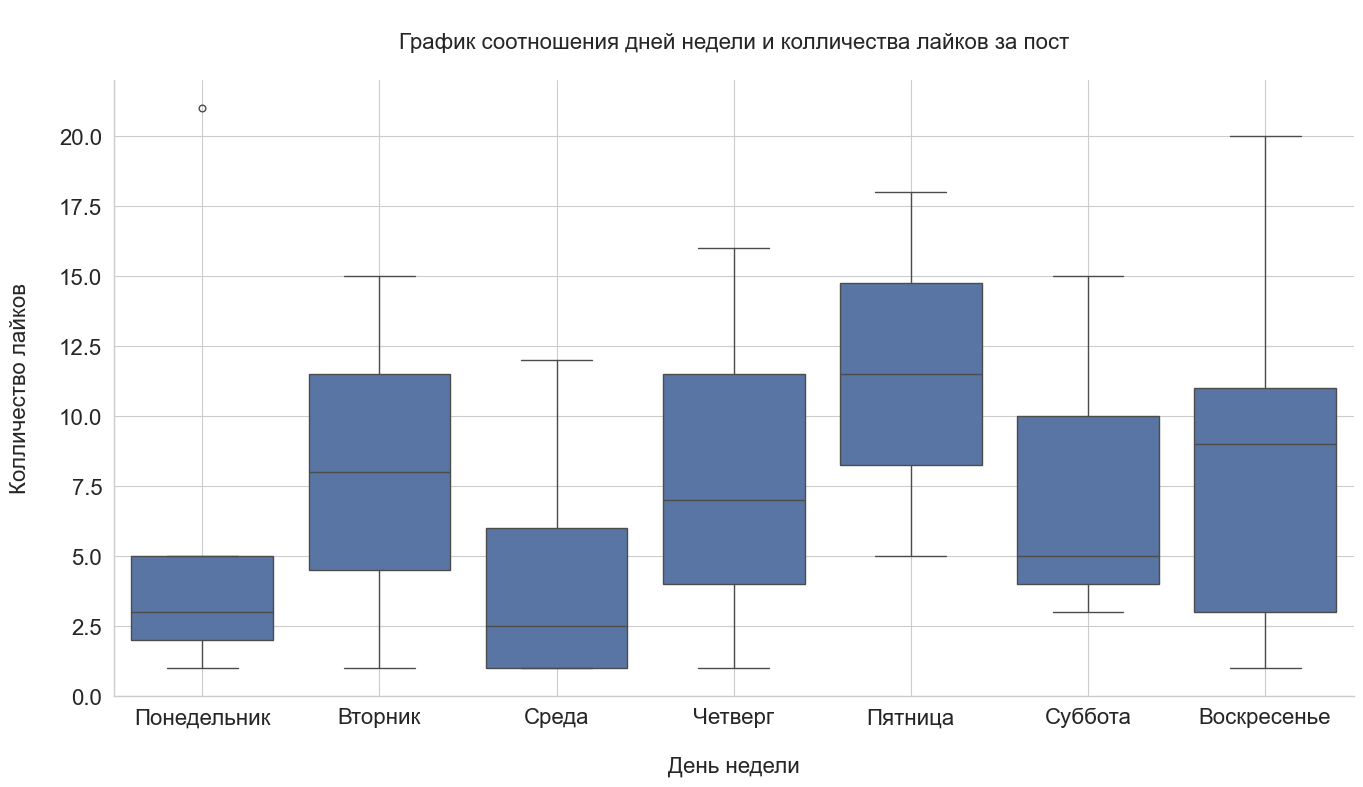

In [29]:
# Визуализирую график соотношения дней недели и колличества лайков за пост.
plt.figure(figsize=(16,8))
sns.set_theme(style='whitegrid')
sns.set_context('paper')
ax = sns.boxplot(x='day_of_week', y='likes', data=df_sorted_by_day_of_week)
ax.set_title('\nГрафик соотношения дней недели и колличества лайков за пост\n', fontsize=16)
ax.set_xlabel('\nДень недели', fontsize=16)
ax.set_ylabel('Колличество лайков\n', fontsize=16)
ax.grid(True)
sns.despine()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [30]:
stats_df_sorted_by_day_of_week = df_sorted_by_day_of_week.groupby('day_of_week')['likes'].describe()

In [31]:
iqr_df_sorted_by_day_of_week = df_sorted_by_day_of_week.groupby('day_of_week')['likes'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

In [32]:
print("Статистики:")
print(stats_df_sorted_by_day_of_week) 

Статистики:
             count       mean       std  min   25%   50%    75%   max
day_of_week                                                          
Воскресенье    9.0   8.222222  5.995369  1.0  3.00   9.0  11.00  20.0
Вторник        2.0   8.000000  9.899495  1.0  4.50   8.0  11.50  15.0
Понедельник    5.0   6.400000  8.294577  1.0  2.00   3.0   5.00  21.0
Пятница        2.0  11.500000  9.192388  5.0  8.25  11.5  14.75  18.0
Среда          4.0   4.500000  5.196152  1.0  1.00   2.5   6.00  12.0
Суббота        3.0   7.666667  6.429101  3.0  4.00   5.0  10.00  15.0
Четверг        3.0   8.000000  7.549834  1.0  4.00   7.0  11.50  16.0


In [33]:
print("Межквартильный интервал (IQR):")
print(iqr_df_sorted_by_day_of_week)

Межквартильный интервал (IQR):
day_of_week
Воскресенье    8.0
Вторник        7.0
Понедельник    3.0
Пятница        6.5
Среда          5.0
Суббота        6.0
Четверг        7.5
Name: likes, dtype: float64


### Интерпретация:
Из графика и вывода статистики видно, что медианные и межквартильные интервалы (представленные ящиками) различаются в зависимости от дня недели. 

#### Характеристика медиан:

Воскресенье и Пятница имеют наивысшую медиану (9.0 и 11.5 соответственно), что означает, что половина лайков в эти дни выше этих значений.

Вторник и Четверг также имеют высокие медианы (8.0 и 7.0).

Среда и Понедельник имеют самые низкие медианы (2.5 и 3.0), что указывает на меньшую активность по сравнению с другими днями.

#### Характеристика среднего количества лайков:

Пятница имеет наибольшее среднее количество лайков (11.50). Это может указывать на то, что пользователи активны перед выходными, что приводит к большему количеству лайков.

Воскресенье также показывает высокое среднее количество лайков (8.22), что может указывать на высокую активность в выходной день.

Четверг и Вторник имеют схожее среднее значение (8.00).

Суббота также показывает значительное среднее (7.67), что также делает её активным днём для лайков.

Понедельник и Среда показывают наименьшие средние значения (6.20 и 4.50 соответственно).

#### Характеристика межквартильного интервала (IQR):
Воскресенье (IQR = 8.0): Воскресенье имеет самый большой IQR, что указывает на значительный разброс лайков. Это говорит о том, что активность пользователей в этот день недели сильно варьируется.

Четверг (IQR = 7.5): В четверг наблюдается заметный разброс в активности пользователей, сравнимый с воскресеньем и вторником.

Вторник (IQR = 7.0): Значительный разброс лайков, но чуть меньший, чем в Воскресенье. Это также указывает на некоторую нестабильность в активности пользователей по вторникам.

Пятница (IQR = 6.5): Средний разброс лайков, что указывает на умеренное варьирование активности пользователей по пятницам.

Суббота (IQR = 6.0): Средний IQR указывает на то, что в Субботу количество лайков варьируется умеренно, но меньше, чем в воскресенье и четверг.

Среда (IQR = 5.0): Разброс лайков меньше среднего, активность пользователей более предсказуема, но может варьироваться в небольших пределах.

Понедельник (IQR = 4.0): Наименьший межквартильный интервал, что говорит о меньшем разбросе в количестве лайков. Пользовательская активность более стабильна по понедельникам, хотя она в среднем ниже.

### Предварительный вывод:
Пятница и Воскресенье являются самыми активными днями недели по количеству лайков, с высоким средним и медианным значениями, а также значительным разбросом.

Четверг, Вторник и Суббота демонстрируют стабильный средний уровень активности, с приличными медианами и разбросом.

Понедельник и Среда имеют наименьшие средние значения и медианы, что указывает на более низкую активность пользователей в эти дни.

Однако, конечный вывод о влиянии дня недели на количество лайков за пост требует дополнительного анализа и проверки гипотез.

### Провожу однофакторный дисперсионный анализ (ANOVA), чтобы узнать p-значение

In [34]:
# Группирую данные по дням недели.
grouped_data_by_day = df_sorted_by_day_of_week.groupby('day_of_week')['likes'].apply(list)

In [35]:
# Провожу однофакторный дисперсионный анализ (ANOVA) по дням недели.
f_stat_day, p_value_day = stats.f_oneway(*grouped_data_by_day)
print("Результаты однофакторного дисперсионного анализа (ANOVA) показали следующие значения:")
print(f"F-статистика: {f_stat_day:.2f}")
print(f"p-значение: {p_value_day:.2f}")

Результаты однофакторного дисперсионного анализа (ANOVA) показали следующие значения:
F-статистика: 0.27
p-значение: 0.94


Поскольку p-значение значительно выше стандартного уровня значимости (0.05), мы не можем отвергнуть нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от дня недели.

## Вывод: 
На основе статистического анализа нельзя утверждать, что день недели оказывает значительное влияние на количество лайков за пост. Различия в среднем количестве лайков в разные периоды времени статистически не значимы.

# Влияние промежутка между постами

Предполагаю нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от промежутка времени между постами.

In [36]:
# Нахожу промежуток времени между постами выраженный в днях.
intervals = '''
WITH ordered_data AS (
    SELECT date,
           LAG(date) OVER (ORDER BY date) AS dt_prev,
           likes
    FROM Like
)
SELECT date,
       dt_prev,
       JULIANDAY(date) - JULIANDAY(dt_prev) AS diff_days,
       likes
FROM ordered_data
WHERE dt_prev IS NOT NULL
ORDER BY date
'''

In [37]:
intervals_likes = pd.read_sql(intervals, conn)

In [38]:
intervals_likes

,date,dt_prev,diff_days,likes
0,2020-12-01 17:07:22,2020-11-29 17:12:58,1.996111,1
1,2021-04-04 06:31:31,2020-12-01 17:07:22,123.558438,11
2,2021-04-04 08:42:04,2021-04-04 06:31:31,0.090660,1
3,2021-04-26 08:01:27,2021-04-04 08:42:04,21.971794,3
4,2021-05-14 13:43:26,2021-04-26 08:01:27,18.237488,18
5,2021-05-16 09:33:32,2021-05-14 13:43:26,1.826458,20
6,2021-06-02 19:00:13,2021-05-16 09:33:32,17.393530,4
7,2021-06-30 20:30:26,2021-06-02 19:00:13,28.062650,1
8,2021-08-01 20:42:26,2021-06-30 20:30:26,32.008333,12
9,2021-08-20 17:05:08,2021-08-01 20:42:26,18.849097,5


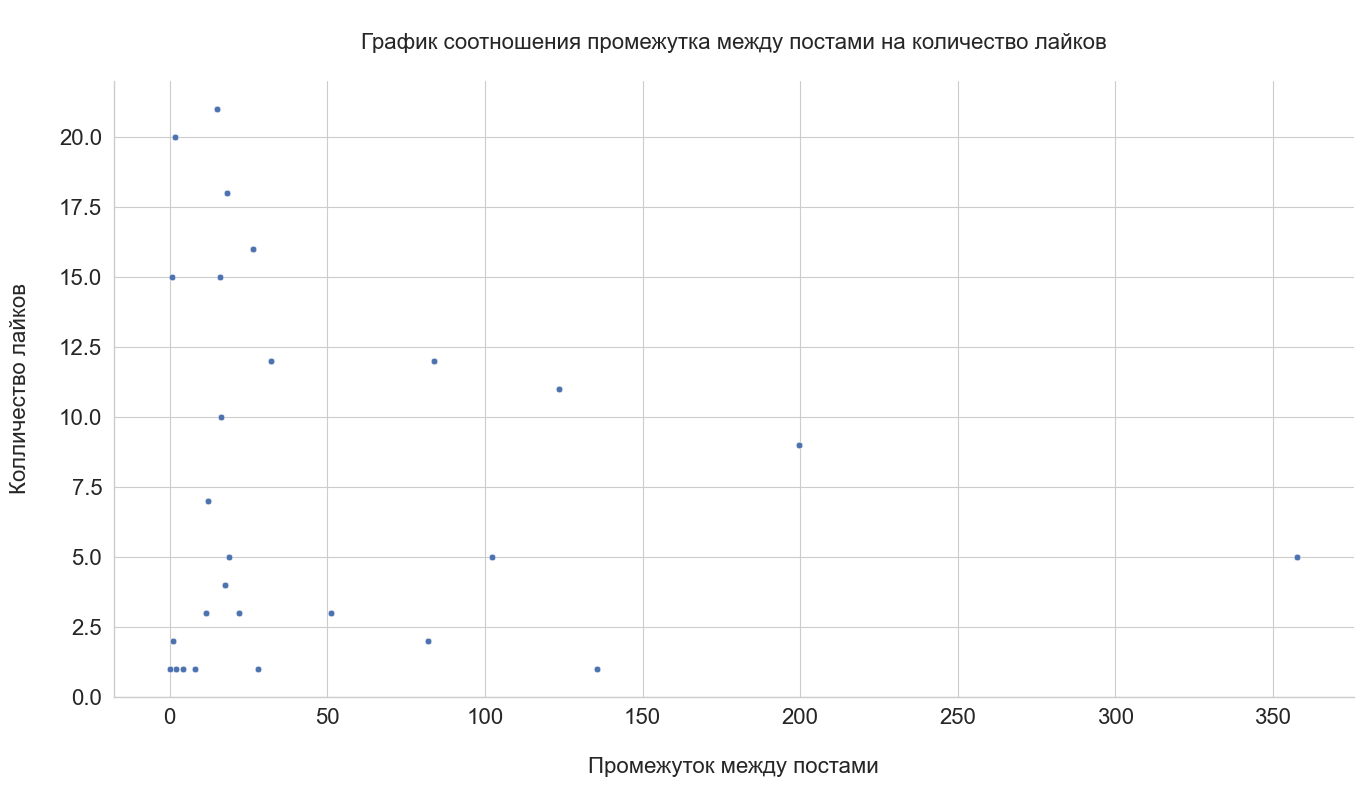

In [39]:
# Визуализирую график соотношения несгрупированного промежутка между постами на количество лайков.
plt.figure(figsize=(16,8)) 
sns.set_theme(style='whitegrid')
sns.set_context('paper')
ax = sns.scatterplot(x='diff_days',y='likes',data=intervals_likes)
ax.set_title('\nГрафик соотношения промежутка между постами на количество лайков\n', fontsize=16)
ax.set_xlabel('\nПромежуток между постами', fontsize=16)
ax.set_ylabel('Колличество лайков\n', fontsize=16)
ax.grid(True)
sns.despine()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [40]:
# Создаю категории для промежутков между постами.
intervals_likes['interval_category'] = pd.cut(intervals_likes['diff_days'], bins=[0, 7, 30, float('inf')],
                                              labels=['Короткий (0-7 дней)', 'Средний (7-30 дней)', 'Длинный (30+ дней)'])


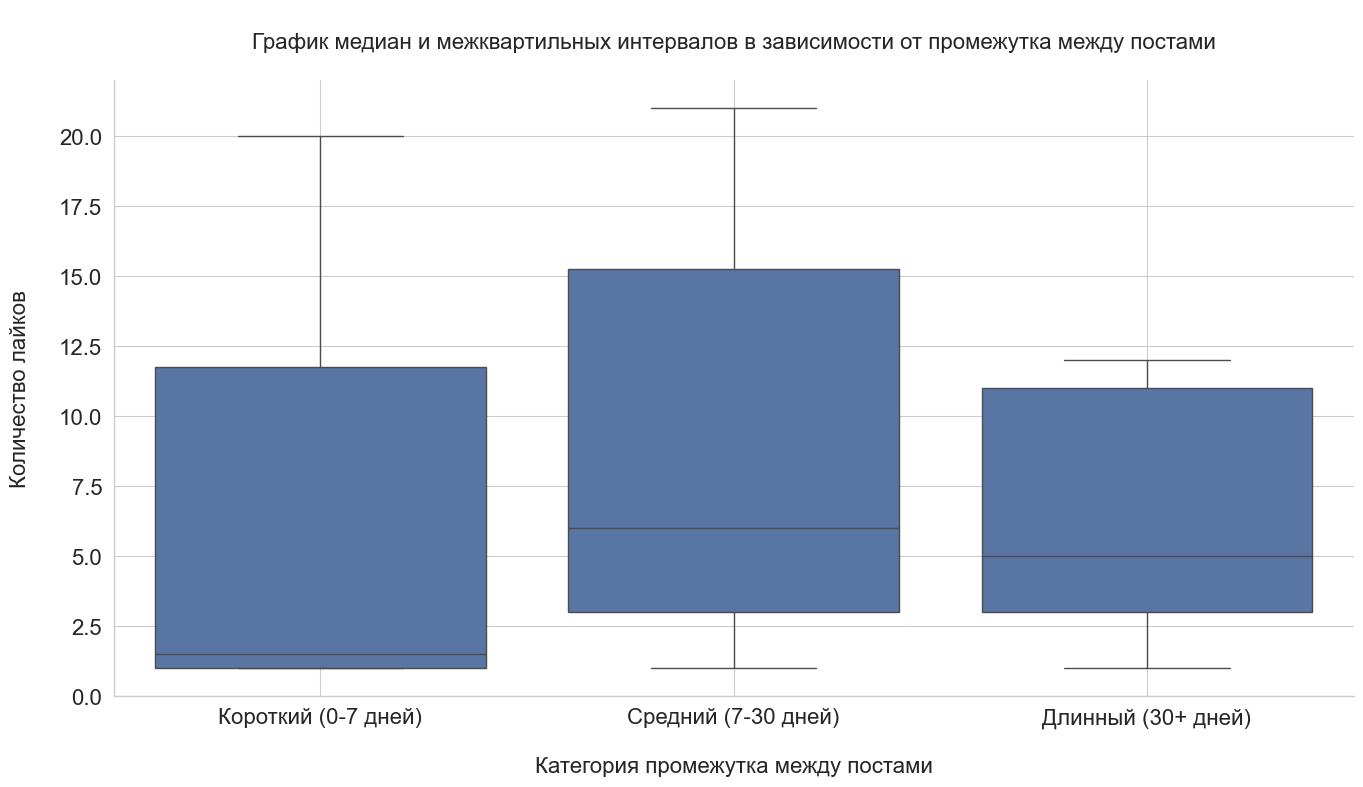

In [41]:
# Визуализирую график соотношения сгрупированного промежутка между постами на количество лайков.
plt.figure(figsize=(16,8)) 
sns.set_theme(style='whitegrid')
sns.set_context('paper')
ax = sns.boxplot(x='interval_category', y='likes', data=intervals_likes)
ax.set_title('\nГрафик медиан и межквартильных интервалов в зависимости от промежутка между постами\n', fontsize=16)
ax.set_xlabel('\nКатегория промежутка между постами', fontsize=16)
ax.set_ylabel('Количество лайков\n', fontsize=16)
ax.grid(True)
sns.despine()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [42]:
stats_interval_category = intervals_likes.groupby('interval_category', observed=False)['likes'].describe()

In [43]:
iqr_interval_category = intervals_likes.groupby('interval_category', observed=False)['likes'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

In [44]:
print("Статистики:")
print(stats_interval_category) 

Статистики:
                     count      mean       std  min  25%  50%    75%   max
interval_category                                                         
Короткий (0-7 дней)    6.0  6.666667  8.547904  1.0  1.0  1.5  11.75  20.0
Средний (7-30 дней)   12.0  8.666667  7.101003  1.0  3.0  6.0  15.25  21.0
Длинный (30+ дней)     9.0  6.666667  4.387482  1.0  3.0  5.0  11.00  12.0


In [45]:
print("Межквартильный интервал (IQR):")
print(iqr_interval_category)

Межквартильный интервал (IQR):
interval_category
Короткий (0-7 дней)    10.75
Средний (7-30 дней)    12.25
Длинный (30+ дней)      8.00
Name: likes, dtype: float64


### Интерпретация:
Из графика и вывода статистики видно, что медианные и межквартильные интервалы (представленные ящиками) различаются в зависимости от категории промежутка времени между постми. 

#### Характеристика среднего количества лайков:

Средний интервал (7-30 дней) имеет наибольшее среднее количество лайков (8.67), что может свидетельствовать о том, что пользователи реагируют активнее на посты, публикуемые через 1-4 недели после предыдущего.

Короткий интервал (0-7 дней) и Длинный интервал (30+ дней) имеют примерно одинаковое среднее количество лайков (6.67 и 6.56 соответственно), что может говорить о том, что слишком частые или, наоборот, слишком редкие публикации получают меньше лайков.

#### Характеристика медиан:

Средний интервал показывает наибольшую медиану (6 лайков), что подтверждает более высокую активность пользователей при умеренной частоте публикаций.

Короткий интервал имеет медиану 1.5 лайка, что указывает на то, что большинство постов, опубликованных с небольшими промежутками, получают мало лайков.

Длинный интервал имеет медиану 5 лайков, что указывает на средний уровень активности при более редких постах, но значительно выше, чем у короткого интервала.

#### Характеристика межквартильного интервала (IQR):

Средний интервал имеет наибольший IQR (12.25), что свидетельствует о большом разбросе количества лайков. Это может означать, что посты в этом интервале времени могут получать как высокое, так и низкое количество лайков.

Короткий интервал имеет IQR 10.75, что также указывает на значительный разброс, хотя медиана указывает на то, что большинство постов получают мало лайков, но иногда бывают исключения с более высоким количеством лайков.

Длинный интервал имеет самый низкий IQR (8.0), что говорит о меньшем разбросе данных. Это может свидетельствовать о том, что при длинных промежутках между постами количество лайков более стабильно, но не достигает высоких значений.

### Предварительный вывод:
Средний интервал (7-30 дней) является наиболее эффективным по количеству лайков, как по среднему значению, так и по медиане. Это говорит о том, что пользователи более активно взаимодействуют с контентом, когда посты публикуются через 1-4 недели после предыдущего.

Короткий интервал (0-7 дней) приводит к меньшему количеству лайков, несмотря на несколько случаев высоких показателей. Это может указывать на то, что слишком частые посты утомляют аудиторию и снижают вовлеченность.

Длинный интервал (30+ дней) также имеет относительно низкие показатели, особенно по медиане, что указывает на снижение интереса при редких публикациях. Тем не менее, количество лайков остается более стабильным в пределах небольшого диапазона.

Однако, конечный вывод о влиянии времени промежутка между постами на количество лайков за пост требует дополнительного анализа и проверки гипотез.

### Провожу корреляционный анализ используя коэффициент корреляции Пирсона для количественной оценки зависимости.

In [46]:
corr_pearson, p_value_corr = stats.pearsonr(intervals_likes['diff_days'], intervals_likes['likes'])
print(f"Значение кореляции Пирсона: {corr_pearson}, p-value: {p_value_corr}")

Значение кореляции Пирсона: -0.09538154038293667, p-value: 0.6360372976541577


Поскольку p-значение значительно выше стандартного уровня значимости (0.05), мы не можем отвергнуть нулевую гипотезу о том, что среднее количество лайков не отличается в зависимости от времени промежутка между постами.

## Вывод: 
На основе статистического анализа нельзя утверждать, что время промежутка между постами  оказывает значительное влияние на количество лайков за пост. Различия в среднем количестве лайков в разные периоды времени между постами статистически не значимы. 

In [47]:
# Отключаюсь от базы данных SQLite в памяти.
conn.close()

# Итоговый вывод по заданию:

Я провёл анализ колличества лайков под постами на своей странице в социальной сети Вконтакте по трём характеристикам: время суток публикации, день недели и промежуток времени между постами.

Проанализировав получившиеся результаты, я могу сказать, что влияние этих характеристик на лайки под постами не значимы, ввиду малого колличества постов, цели того, чтобы на пост ставили лайки, и отсутствия сравнения, на мой взгляд, более важных характеристик, такие как: наличие или отсутствие музыки, фото, видео в посте; характер поста: об увлечениях, о новостях, о друзьях, о чувствах; знаменательность дня: день рождение, новый год, день победы и иные.

Кроме того, на мой взгляд, было бы более правильным смотреть по частному количества лайков на количество просмотров записи.